In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [31]:
le = LabelEncoder()

In [3]:
df = pd.read_csv(r'c:\Users\Dell\Downloads\ekVGEMhRQDM33DRh.csv')

df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
print(f"The total number of rows {df.shape[0]} and total number of column is {df.shape[1]}")

The total number of rows 4000 and total number of column is 19


In [5]:
df.isnull().sum().reset_index()

,index,0
0,Id,0
1,Age,0
2,Job,19
3,Marital,0
4,Education,169
5,Default,0
6,Balance,0
7,HHInsurance,0
8,CarLoan,0
9,Communication,902


<Axes: >

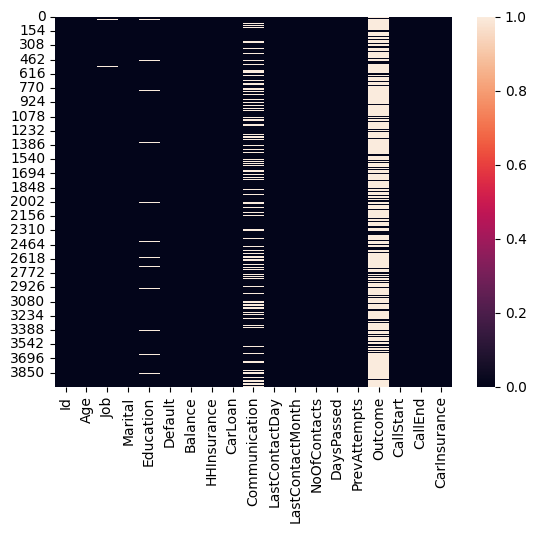

In [4]:
sns.heatmap(df.isnull())

In [8]:
# the outcome col contain mostly null value 
df.drop(columns=['Outcome'], inplace=True)

In [ ]:
# The dataset does not contain any duplicate value
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [16]:
corr_matrix = df[['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']]

corr_matrix.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,0
1,32,0,1156,1,0,26,5,-1,0,0
2,29,0,637,1,0,3,1,119,1,1
3,25,0,373,1,0,11,2,-1,0,1
4,30,0,2694,0,0,3,1,-1,0,0


<Axes: >

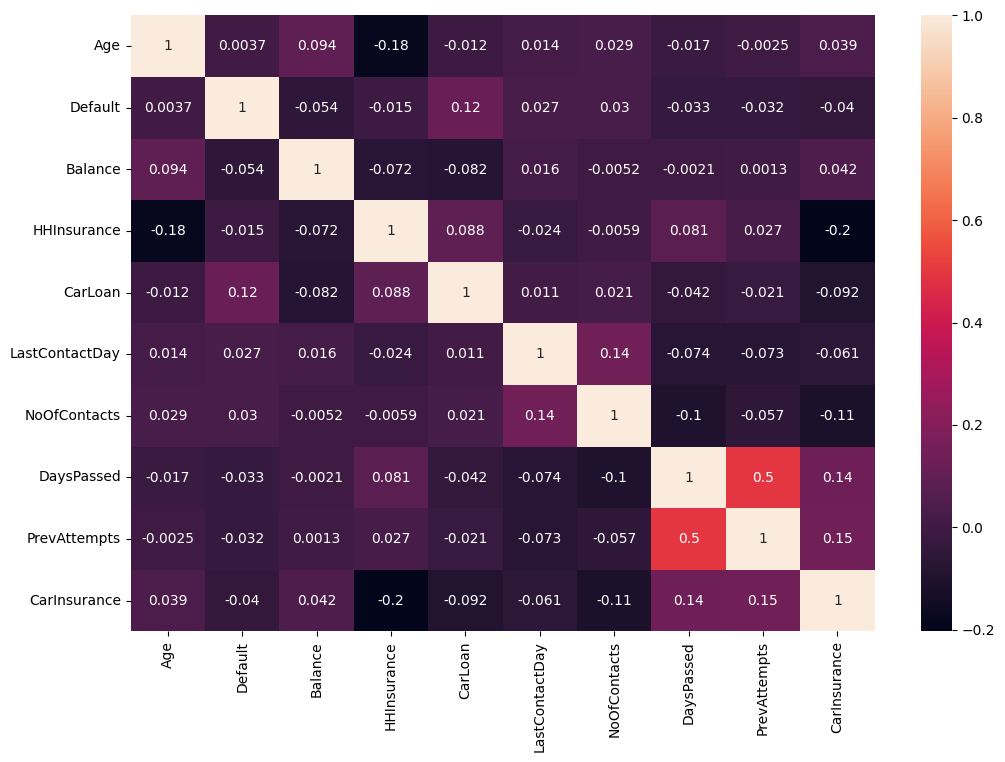

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.corr(), annot=True)

In [19]:
df['Job'].value_counts()

Job
management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: count, dtype: int64

In [21]:
most_frequent_job = 'management'  # Replace this with the most frequent job value
df['Job'].fillna(most_frequent_job, inplace=True)


In [23]:
print(df.Job.isnull().sum())
print(df.Job.value_counts())

0
Job
management       912
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: count, dtype: int64


In [24]:
df.Education.value_counts()

Education
secondary    1988
tertiary     1282
primary       561
Name: count, dtype: int64

In [ ]:
most_frequent = 'secondary'  
df['Education'].fillna(most_frequent, inplace=True)


In [26]:
print(df.Education.isnull().sum())
print(df.Education.value_counts())

0
Education
secondary    2157
tertiary     1282
primary       561
Name: count, dtype: int64


In [27]:
df.Communication.value_counts()


Communication
cellular     2831
telephone     267
Name: count, dtype: int64

In [28]:
most_frequent = "cellular"
df.Communication.fillna(most_frequent, inplace=True)

print(df.Communication.isnull().sum())
print(df.Communication.value_counts())

0
Communication
cellular     3733
telephone     267
Name: count, dtype: int64


In [29]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [32]:
df['marital_encoded'] = le.fit_transform(df['Marital'])

In [36]:
le.classes_

array(['divorced', 'married', 'single'], dtype=object)

In [34]:
contingency_table = pd.crosstab(df['marital_encoded'], df['CarInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

CarInsurance        0    1
marital_encoded           
0                 273  210
1                1471  833
2                 652  561
Chi-square statistic: 36.3205816816234
P-value: 1.2974358623751477e-08


In [37]:
df['job_encoded'] = le.fit_transform(df['Job'])
df['education_encoded'] = le.fit_transform(df['Education'])
df['com_encoded'] = le.fit_transform(df['Communication'])

In [39]:
contingency_table = pd.crosstab(df['job_encoded'], df['CarInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

CarInsurance    0    1
job_encoded           
0             274  185
1             540  219
2              86   35
3              72   37
4             511  401
5             103  146
6              86   54
7             218  112
8              44   87
9             406  254
10             56   74
Chi-square statistic: 148.4219991737766
P-value: 7.869647347637269e-27


In [40]:
contingency_table = pd.crosstab(df['education_encoded'], df['CarInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

CarInsurance          0    1
education_encoded           
0                   366  195
1                  1348  809
2                   682  600
Chi-square statistic: 36.67735234641606
P-value: 1.0854607711818832e-08


In [ ]:
# Here the p value is less than 0.05 therefor this will be useful in prediction

contingency_table = pd.crosstab(df['com_encoded'], df['CarInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

CarInsurance     0     1
com_encoded             
0             2252  1481
1              144   123
Chi-square statistic: 3.979424389832577
P-value: 0.046059300501133466


In [51]:
# Based on the all preprocess only these column are useful 
# Communication, Age, Balance, PrevAttempts, DaysPassed
data = df[['com_encoded', 'Age', 'Balance', 'PrevAttempts', 'DaysPassed', 'CarInsurance']]

In [52]:
data.head()

,com_encoded,Age,Balance,PrevAttempts,DaysPassed,CarInsurance
0,1,32,1218,0,-1,0
1,0,32,1156,0,-1,0
2,0,29,637,1,119,1
3,0,25,373,0,-1,1
4,0,30,2694,0,-1,0


In [53]:
X = data[['com_encoded', 'Age', 'Balance', 'PrevAttempts', 'DaysPassed']]  # Include other features as needed
y = data['CarInsurance']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.64125
Precision: 0.638095238095238
Recall: 0.2120253164556962
F1 Score: 0.3182897862232779


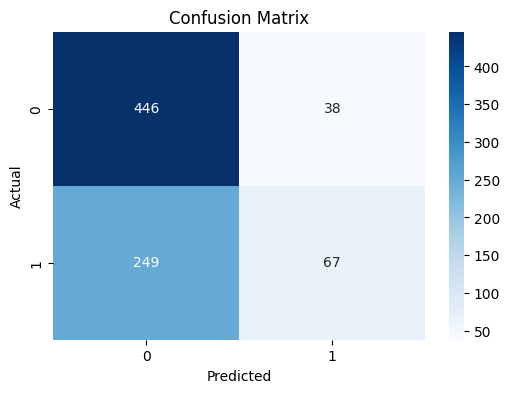

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()